<a href="https://colab.research.google.com/github/davidcechak/muni_nn_course/blob/main/03_One_Hot_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set up

In [1]:
from tensorflow import keras as K
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## One-hot encoding

### One-hot description

In natural language processing, a one-hot vector is a 1 × N matrix (vector) used to distinguish each word in a vocabulary from every other word in the vocabulary. The vector consists of 0s in all cells with the exception of a single 1 in a cell used uniquely to identify the word. One-hot encoding ensures that machine learning does not assume that higher numbers are more important. For example, the value '8' is bigger than the value '1', but that does not make '8' more important than '1'. The same is true for words: the value 'laughter' is not more important than 'laugh'.


One hot encoding is useful for data that has no relationship to each other. Machine learning algorithms treat the order of numbers as an attribute of significance. In other words, they will read a higher number as better or more important than a lower number.

While this is helpful for some ordinal situations, some input data does not have any ranking for category values, and this can lead to issues with predictions and poor performance. That’s when one hot encoding saves the day.


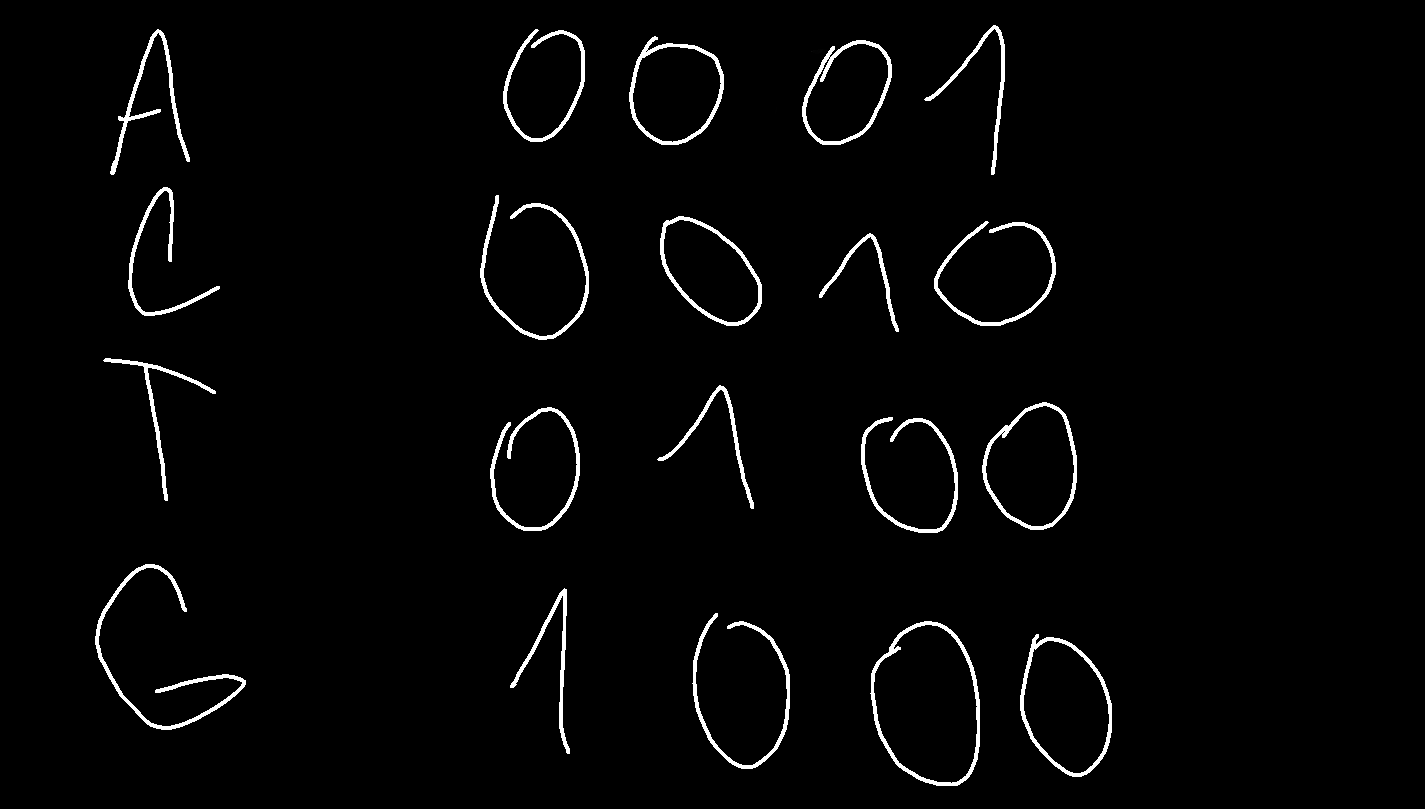

### One-hot code

In [2]:
# get train dataset
!wget https://raw.githubusercontent.com/ML-Bioinfo-CEITEC/penguinn/master/Datasets/train_set_1_1.txt


--2021-12-08 15:03:14--  https://raw.githubusercontent.com/ML-Bioinfo-CEITEC/penguinn/master/Datasets/train_set_1_1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63000000 (60M) [text/plain]
Saving to: ‘train_set_1_1.txt’

train_set_1_1.txt   100%[===================>]  60.08M   160MB/s    in 0.4s    

2021-12-08 15:03:18 (160 MB/s) - ‘train_set_1_1.txt’ saved [63000000/63000000]



In [3]:
df_train = pd.read_csv("train_set_1_1.txt", sep='\t', names=['sequence', 'label'])

labels_train = np.array(list(map((lambda x: 1 if x == 'positive' else 0), list(df_train['label']))))
dataset_train = df_train['sequence'].tolist()


nucleo_dic = {
    "A": 0,
    "C": 1,
    "T": 2,
    "G": 3,
    "N": 4,
}

dataset_ordinal_train = [[nucleo_dic[letter] for letter in sequence] for sequence in dataset_train]

print('Explore for a random sequence')
example_sequence = 42
print(dataset_train[example_sequence])
print(dataset_ordinal_train[example_sequence])

Explore for a random sequence
CCGAGGTAAAAGTGCTGAAACCATGTGAATAAAATACAGGTGGGTTCCGCCAGCTTCGCTCCTGAACCTACCCGCGCTCGGGATCCAGAAGCTGCGCCGGGAGAGAGGGGCTCAGGCCTGGGCGGAGGGGACGGAGGTCAGACCGTGCGGAAAGTGACCCGGGCACCCCAGGGCGCCCAGGCCCCCAGGGAGCGCGGAAA
[1, 1, 3, 0, 3, 3, 2, 0, 0, 0, 0, 3, 2, 3, 1, 2, 3, 0, 0, 0, 1, 1, 0, 2, 3, 2, 3, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 3, 3, 2, 3, 3, 3, 2, 2, 1, 1, 3, 1, 1, 0, 3, 1, 2, 2, 1, 3, 1, 2, 1, 1, 2, 3, 0, 0, 1, 1, 2, 0, 1, 1, 1, 3, 1, 3, 1, 2, 1, 3, 3, 3, 0, 2, 1, 1, 0, 3, 0, 0, 3, 1, 2, 3, 1, 3, 1, 1, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 1, 2, 1, 0, 3, 3, 1, 1, 2, 3, 3, 3, 1, 3, 3, 0, 3, 3, 3, 3, 0, 1, 3, 3, 0, 3, 3, 2, 1, 0, 3, 0, 1, 1, 3, 2, 3, 1, 3, 3, 0, 0, 0, 3, 2, 3, 0, 1, 1, 1, 3, 3, 3, 1, 0, 1, 1, 1, 1, 0, 3, 3, 3, 1, 3, 1, 1, 1, 0, 3, 3, 1, 1, 1, 1, 1, 0, 3, 3, 3, 0, 3, 1, 3, 1, 3, 3, 0, 0, 0]


In [4]:
# tf.one_hot
dataset_onehot_train = tf.one_hot(dataset_ordinal_train, depth=5)

print("\n Let's check examples of how the ACTG characters got translated into one-hot: \n")
print("characters: ", dataset_train[example_sequence][0:10])
print("ordinal form: ", dataset_ordinal_train[example_sequence][0:10])
print("one-hot: ", dataset_onehot_train[example_sequence][0:10], "\n")

print("characters: ", dataset_train[example_sequence][80:85])
print("ordinal form: ", dataset_ordinal_train[example_sequence][80:85])
print("one-hot: ", dataset_onehot_train[example_sequence][80:85])


 Let's check examples of how the ACTG characters got translated into one-hot: 

characters:  CCGAGGTAAA
ordinal form:  [1, 1, 3, 0, 3, 3, 2, 0, 0, 0]
one-hot:  tf.Tensor(
[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]], shape=(10, 5), dtype=float32) 

characters:  GGATC
ordinal form:  [3, 3, 0, 2, 1]
one-hot:  tf.Tensor(
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]], shape=(5, 5), dtype=float32)


In [5]:
# get test dataset
!wget --quiet https://raw.githubusercontent.com/ML-Bioinfo-CEITEC/penguinn/master/Datasets/test_set_1_1.txt

# preprocess the test set similarly
df_test = pd.read_csv("test_set_1_1.txt", sep='\t', names=['sequence', 'label'])

labels_test = np.array(list(map((lambda x: 1 if x == 'positive' else 0), list(df_test['label']))))
dataset_test = df_test['sequence'].tolist()

# we use the same nucleo_dic as on the example before
dataset_ordinal_test = [[nucleo_dic[letter] for letter in sequence] for sequence in dataset_test]
dataset_onehot_test = tf.one_hot(dataset_ordinal_test, depth=5)

In [6]:
# Make the training dataset smaller so we do not have to wait long :)
number_of_examples = 1000

print(dataset_onehot_train[0:number_of_examples].shape)
print(labels_train[0:number_of_examples].shape)

dataset_onehot_train_small = dataset_onehot_train[0:number_of_examples]
labels_train_small = labels_train[0:number_of_examples]

(1000, 200, 5)
(1000,)


In [7]:
# sequence_size = length of the sequence
sequence_size = 200
# channel = each channel corresponds to a nucleotide
channel = len(nucleo_dic)

# The CNN model

In [8]:
# create the NN model
model = tf.keras.Sequential([
  tf.keras.layers.Conv1D(
    filters=10,
    kernel_size=6,
    strides=1,
    padding='same',
    data_format="channels_last",
    activation='relu',
    input_shape=(sequence_size, channel)),

  tf.keras.layers.Conv1D(
    filters=10,
    kernel_size=6,
    strides=1,
    padding='same',
    data_format="channels_last",
    activation='relu'),
  
  tf.keras.layers.Flatten(),
  
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = K.optimizers.SGD()

model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [9]:
num_epochs=20

history = model.fit(
    dataset_onehot_train_small,
    labels_train_small,
    batch_size=32,
    epochs=num_epochs,
)

Epoch 1/20
32/32 [==============================] - 9s 9ms/step - loss: 0.6949 - accuracy: 0.5170
Epoch 2/20
32/32 [==============================] - 0s 5ms/step - loss: 0.6890 - accuracy: 0.5490
Epoch 3/20
32/32 [==============================] - 0s 5ms/step - loss: 0.6837 - accuracy: 0.5740
Epoch 4/20
32/32 [==============================] - 0s 5ms/step - loss: 0.6747 - accuracy: 0.6130
Epoch 5/20
32/32 [==============================] - 0s 5ms/step - loss: 0.6564 - accuracy: 0.6690
Epoch 6/20
32/32 [==============================] - 0s 5ms/step - loss: 0.6239 - accuracy: 0.7310
Epoch 7/20
32/32 [==============================] - 0s 5ms/step - loss: 0.5624 - accuracy: 0.7840
Epoch 8/20
32/32 [==============================] - 0s 5ms/step - loss: 0.4634 - accuracy: 0.8240
Epoch 9/20
32/32 [==============================] - 0s 5ms/step - loss: 0.3731 - accuracy: 0.8560
Epoch 10/20
32/32 [==============================] - 0s 5ms/step - loss: 0.3444 - accuracy: 0.8590
Epoch 11/20
32/32 [

In [10]:
metrics = model.evaluate(
    dataset_onehot_test,
    labels_test,
    verbose=0
)

In [11]:
print('model evaluation on unknown (that is "test") dataset [loss, accuracy]:', metrics)

# just a trick for the plotting
for met in range(len(metrics)):
  repeted_list = []
  for i in range(len(history.history['accuracy'])):
    repeted_list.append(metrics[met])
  metrics[met] = repeted_list
# print(metrics)


model evaluation on unknown (that is "test") dataset [loss, accuracy]: [0.27055132389068604, 0.8853300213813782]


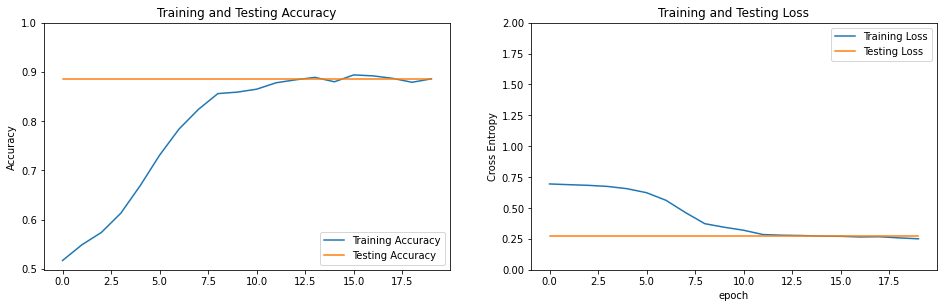

In [12]:

# training history
acc = history.history['accuracy']

loss = history.history['loss']

# acc
plt.figure(figsize=(16, 10))

# acc
plt.subplot(2, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(metrics[1], label='Testing Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Testing Accuracy')

# loss
plt.subplot(2, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(metrics[0], label='Testing Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,2.0])
plt.title('Training and Testing Loss')
plt.xlabel('epoch')
plt.show()